In [1]:
%matplotlib inline
import os
import numpy as np
from tqdm import tqdm
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob2

In [2]:
SEG_INPUT = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/3EVALUATE_NEW_VGG_CUSTOM/3SEGMENTATION/SEGMENTATION/ALL/"
EXPLAIN_OUT = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/2EXPLAIN_NEW_VGG_CUSTOM/CUSTOMCNN/XRAY/OUT/CUSTOM-XRAY-TRUE/*"
#EXPLAIN_OUT = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/2EXPLAIN_NEW_VGG_CUSTOM/CUSTOMCNN/XRAY/OUT/CUSTOM-XRAY-RANDOM/*"

#EXPLAIN_OUT = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/2EXPLAIN_NEW_VGG_CUSTOM/CUSTOMCNN/XRAY/OUT/CUSTOM-XRAY-TRUE/*"

SEG_FILES = glob2.glob(SEG_INPUT)
EXPLAIN_FILES = glob2.glob(EXPLAIN_OUT)

In [3]:
#
def score_loc(im_e, im_s):
    indices_255 = 0
    all_indices = np.argwhere(im_e == np.amax(im_e))
    for indices in all_indices:
        x, y = indices
        if(im_s[x, y] > 250):
            indices_255 += 1
    return indices_255/len(all_indices)

In [4]:
scores = {}
for method in EXPLAIN_FILES:
    scores[method.split("/")[-1]] = 0
    for file in glob2.glob(method + "/*"):
        filename, _ = os.path.splitext(os.path.basename(file))
        explanation = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)
        segmentation = cv2.cvtColor(cv2.imread(SEG_INPUT+filename+"_predict.jpeg"), cv2.COLOR_BGR2GRAY)
        score = score_loc(explanation, segmentation)
        scores[method.split("/")[-1]] = scores[method.split("/")[-1]] + score
    scores[method.split("/")[-1]] = scores[method.split("/")[-1]]/50

In [5]:
del scores['Original']
df = pd.DataFrame(scores, index=[0]).transpose()

<AxesSubplot:>

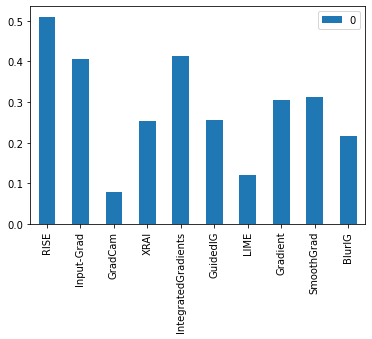

In [6]:
df.plot(kind="bar")

In [7]:
df

,0
RISE,0.510543
Input-Grad,0.407173
GradCam,0.079041
XRAI,0.252293
IntegratedGradients,0.412803
GuidedIG,0.255119
LIME,0.120396
Gradient,0.304326
SmoothGrad,0.311292
BlurIG,0.215802


In [8]:
df.to_csv("custom_segmentation.csv")